Importing necessary libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data sets

In [105]:
#Source : World Health organization
df1=pd.read_csv(r'C:\Users\Piyush\Documents\PDS Project\Data Sets\country_vaccinations.csv')
df1.head()

df2=pd.read_csv(r'C:\Users\Piyush\Documents\PDS Project\Data Sets\COVID19_India.csv')
df2.head()

df3=pd.read_csv(r'C:\Users\Piyush\Documents\PDS Project\Data Sets\StatewiseTestingDetails.csv')
df3.head()

df1.drop(['source_name', 'source_website'], axis=1, inplace=True)
df1.head()


country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            34.0   
2                                  NaN                            34.0   
3                                  NaN                            34.0   
4                                  NaN                            34.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

Handling Missing Values (By Interpolation)

In [106]:
# Select only numerical columns
numeric_df = df2.select_dtypes(include=['number'])

# Interpolate and fill missing values in the numerical columns
numeric_df_filled = numeric_df.interpolate(method='linear', axis=0).fillna(method='ffill').fillna(method='bfill')

# Replace the numerical columns in the original DataFrame with the filled ones
df2[numeric_df.columns] = numeric_df_filled

df2.head()


C:\Users\Piyush\AppData\Local\Temp\ipykernel_29860\159678766.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numeric_df_filled = numeric_df.interpolate(method='linear', axis=0).fillna(method='ffill').fillna(method='bfill')


date location  total_cases  new_cases  total_deaths  new_deaths  \
0  30-01-20    India            1          1           1.0           0   
1  31-01-20    India            1          0           1.0           0   
2  01-02-20    India            1          0           1.0           0   
3  02-02-20    India            2          1           1.0           0   
4  03-02-20    India            3          1           1.0           0   

   total_tests  new_tests  total_vaccinations  people_vaccinated  \
0       6500.0      191.0            191181.0           191181.0   
1       6500.0      191.0            191181.0           191181.0   
2       6500.0      191.0            191181.0           191181.0   
3       6500.0      191.0            191181.0           191181.0   
4       6500.0      191.0            191181.0           191181.0   

   people_fully_vaccinated  new_vaccinations  new_cases_smoothed  \
0                   7668.0          191181.0               0.429   
1                   7668.0          191181.0               0.429   
2                   7668.0          191181.0               0.429   
3                   7668.0          191181.0               0.429   
4                   7668.0          191181.0               0.429   

   new_deaths_smoothed  
0                0.429  
1                0.429  
2                0.429  
3                0.429  
4                0.429

Plotting a line chart - Total cases vs Deaths

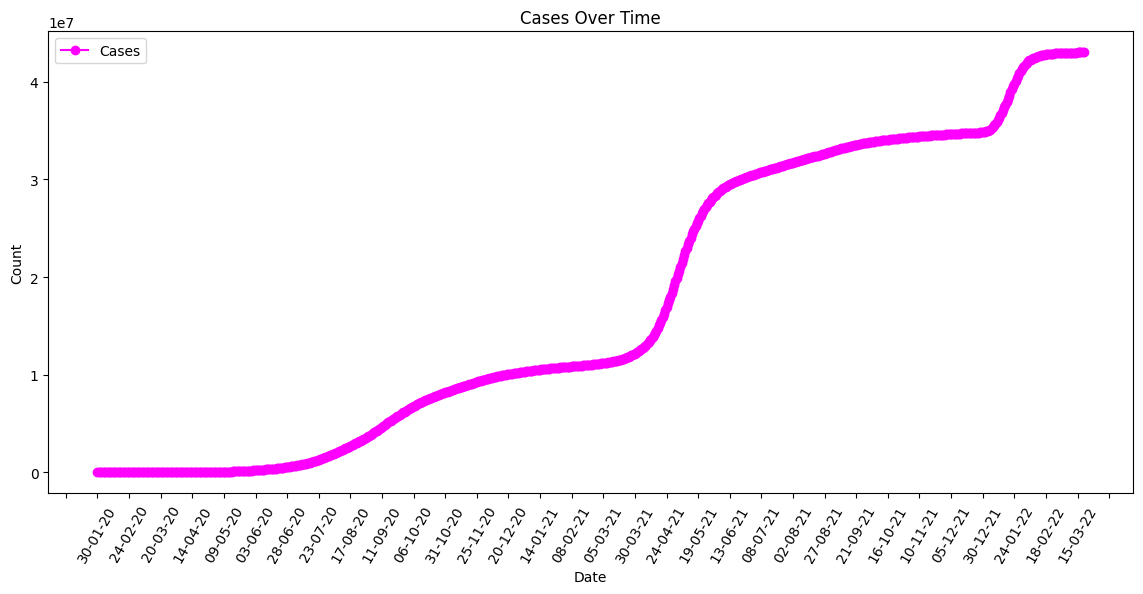

In [107]:
plt.figure(figsize=(14,6))
plt.plot(df2['date'],df2['total_cases'], label='Cases', color='magenta', marker='o')
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(40))

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Cases Over Time')
plt.legend()
plt.show()

#This graph shows us the pattern in which cases were registerded in India till March 2022. As we can observe, there are 3 spikes so we can confirm there were 3 waves of different virus vairants


Positivity Rate vs New Cases wrt Dates

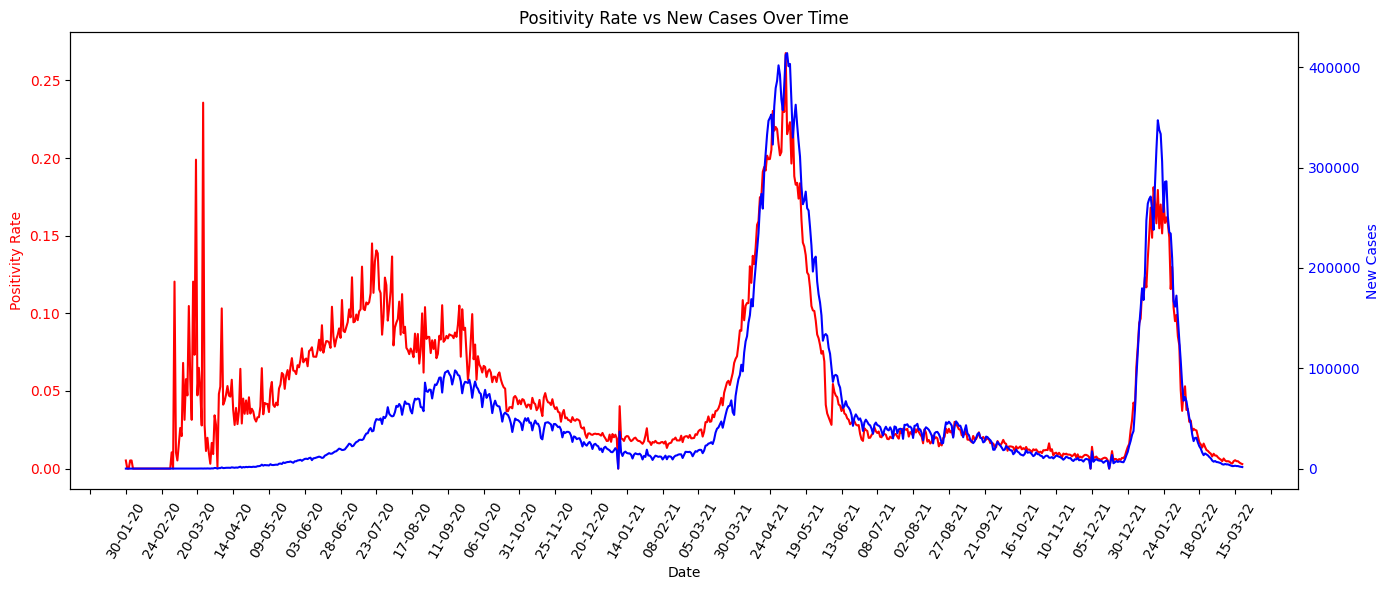

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df2 already has 'new_cases' and 'new_tests' columns
# Adding a column for positivity rate
df2['positivity_rate'] = df2['new_cases'] / df2['new_tests']

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Positivity Rate on the left y-axis
ax1.plot(df2['date'], df2['positivity_rate'], label="Positivity Rate", color="red")
ax1.set_xlabel('Date')
ax1.set_ylabel('Positivity Rate', color="red")
ax1.tick_params(axis='y', labelcolor="red")

# Format x-axis labels and set the tick locator
ax1.tick_params(axis='x', rotation=60)
ax1.xaxis.set_major_locator(plt.MaxNLocator(40))

# Plot New Cases on the right y-axis
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
ax2.plot(df2['date'], df2['new_cases'], label="New Cases", color="blue")
ax2.set_ylabel('New Cases', color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# Title and layout adjustments
plt.title('Positivity Rate vs New Cases Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap

plt.show()


Positive to Negative Cases Statewise India

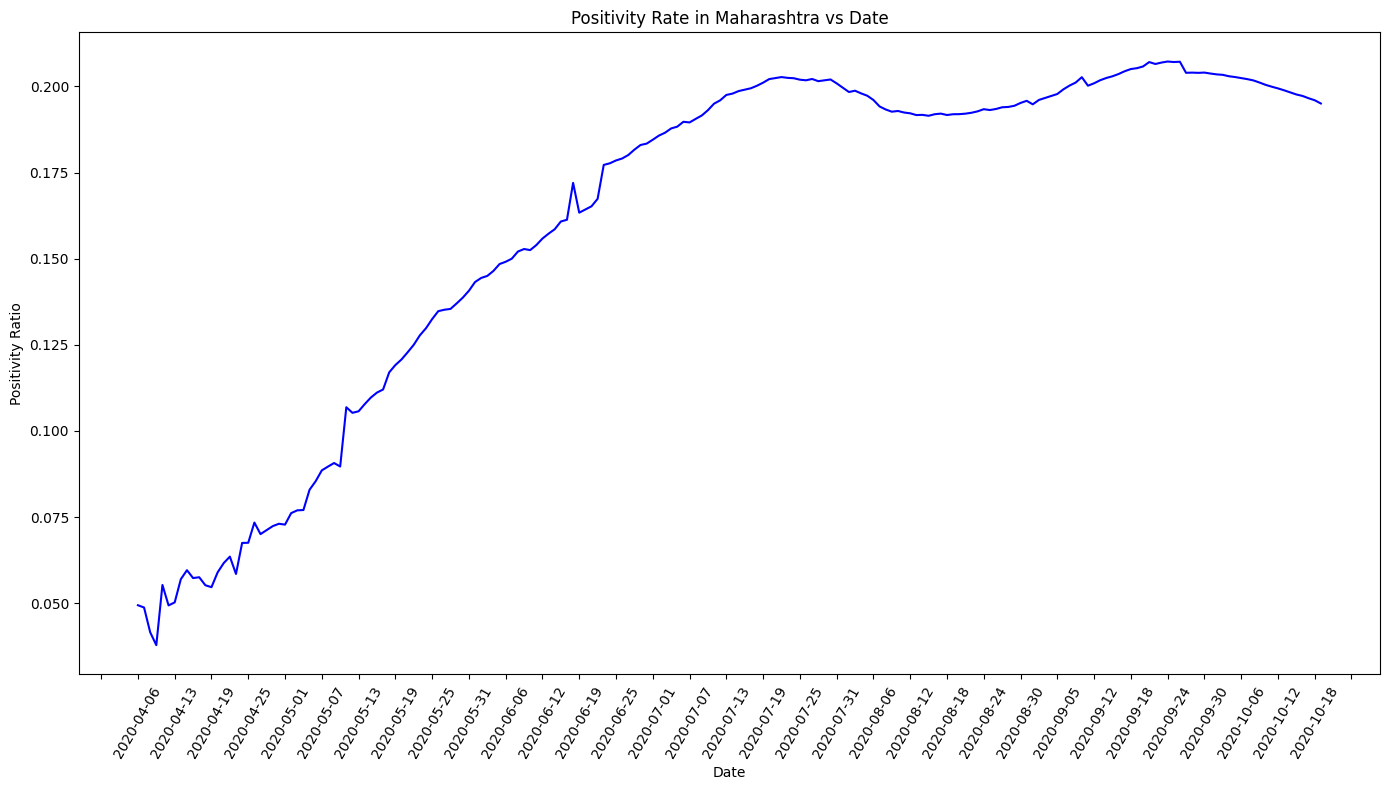

Date        State  TotalSamples Negative   Positive  \
8889  2020-04-06  Maharashtra       17563.0    15808      868.0   
8890  2020-04-07  Maharashtra       20877.0    19290     1018.0   
8891  2020-04-09  Maharashtra       20877.0    19290      868.0   
8892  2020-04-10  Maharashtra       30000.0    28865     1135.0   
8893  2020-04-11  Maharashtra       31841.0    30477     1761.0   
...          ...          ...           ...      ...        ...   
9079  2020-10-15  Maharashtra     7914651.0  6350036  1564615.0   
9080  2020-10-16  Maharashtra     7989693.0  6413631  1576062.0   
9081  2020-10-17  Maharashtra     8069100.0  6482779  1586321.0   
9082  2020-10-18  Maharashtra     8139466.0  6544085  1595381.0   
9084  2020-10-20  Maharashtra     8251234.0  6641718  1609516.0   

      Positivity Ratio  
8889          0.049422  
8890          0.048762  
8891          0.041577  
8892          0.037833  
8893          0.055306  
...                ...  
9079          0.197686  
9080          0.197262  
9081          0.196592  
9082          0.196006  
9084          0.195064  

[194 rows x 6 columns]

In [109]:
# Create a filtered DataFrame for Maharashtra and calculate Positivity Ratio
df3_maharashtra = df3[df3['State'] == 'Maharashtra'].copy()
df3_maharashtra['Positivity Ratio'] = df3_maharashtra['Positive'] / df3_maharashtra['TotalSamples']

# Drop null values safely
df3_maharashtra = df3_maharashtra.dropna()

# Plotting
plt.figure(figsize=(14, 8))

# Plot the Positivity Ratio over Date
plt.plot(df3_maharashtra['Date'], df3_maharashtra['Positivity Ratio'], color="blue")
plt.xlabel('Date')
plt.ylabel('Positivity Ratio')
plt.title('Positivity Rate in Maharashtra vs Date')

# Rotate x-axis labels
plt.tick_params(axis='x', rotation=60)

# Set the major locator for x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(40))  # Apply to the current x-axis

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

# Display the DataFrame
df3_maharashtra

#initially, less number of ppl getting positive but more ppl testing to be cautious

Countries with most people vaccinated and least people vaccinated

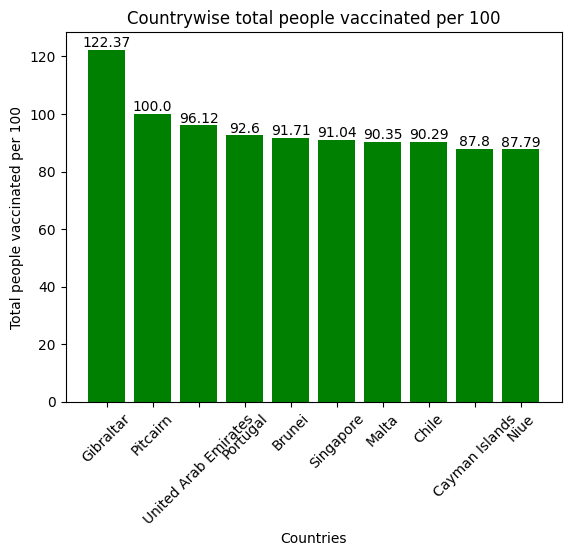

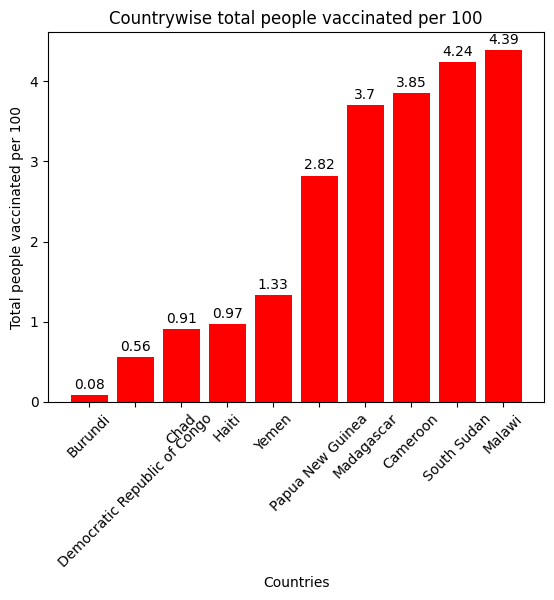

In [110]:
df1.head()
df1_last_rows = df1.groupby('country').tail(1)

#Top 10
df1_maharashtra_max10=df1_last_rows.nlargest(10,'people_fully_vaccinated_per_hundred') #not normal but per hundred because then only india and china will come.

plt.bar(df1_maharashtra_max10['country'], df1_maharashtra_max10['people_fully_vaccinated_per_hundred'], color='green')
plt.xlabel('Countries')
plt.ylabel('Total people vaccinated per 100')
plt.title('Countrywise total people vaccinated per 100')
plt.xticks(rotation=45)
for index, value in enumerate(df1_maharashtra_max10['people_fully_vaccinated_per_hundred']):
    plt.text(index, value + 1, str(round(value, 2)), ha='center')  # Offset by +1 for spacing

plt.show()

#Bottom 10
df1_maharashtra_min10=df1_last_rows.nsmallest(10,'people_fully_vaccinated_per_hundred') #not normal but per hundred because then only india and china will come.

plt.bar(df1_maharashtra_min10['country'], df1_maharashtra_min10['people_fully_vaccinated_per_hundred'], color='red')
plt.xlabel('Countries')
plt.ylabel('Total people vaccinated per 100')
plt.title('Countrywise total people vaccinated per 100')
plt.xticks(rotation=45)
for index, value in enumerate(df1_maharashtra_min10['people_fully_vaccinated_per_hundred']):
    plt.text(index, value + 0.08, str(round(value, 2)), ha='center')  # Offset by +1 for spacing
plt.show()

Most Used Vaccines around the Globe

          vaccine_name  count
0   Oxford/AstraZeneca    183
1      Pfizer/BioNTech    158
2    Sinopharm/Beijing     90
3              Moderna     90
4      Johnson&Johnson     89
5            Sputnik V     58
6              Sinovac     51
7              Novavax     11
8              Covaxin      9
9        Sputnik Light      8
10             CanSino      7
11              Abdala      4
12          Soberana02      4
13              ZF2001      3
14     Sinopharm/Wuhan      2
15              QazVac      2
16        EpiVacCorona      2
17       Soberana Plus      1
18     COVIran Barekat      1
19           FAKHRAVAC      1
20       Razi Cov Pars      1
21            SpikoGen      1
22             Medigen      1
23            Turkovac      1


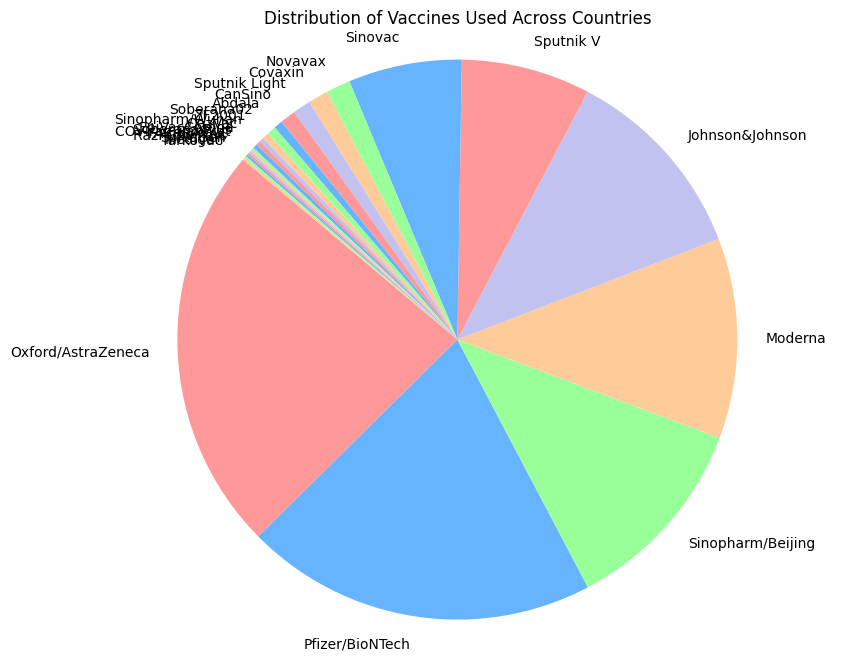

In [111]:
# Select last row of every country
df1_vaccines_by_country = df1.groupby('country').tail(1)

# Split the vaccine names in each row by ', ', then explode the list into individual rows
df1_all_vaccines_used = df1_vaccines_by_country['vaccines'].str.split(',').explode().reset_index(drop=True)

# Remove leading/trailing spaces from each vaccine name
df1_all_vaccines_used = df1_all_vaccines_used.str.strip()

# Get the count of each vaccine used across all countries
vaccine_counts = df1_all_vaccines_used.value_counts().reset_index()

# Rename the columns for clarity
vaccine_counts.columns = ['vaccine_name', 'count']

# Display the vaccine counts
print(vaccine_counts)
plt.figure(figsize=(10, 8))
plt.pie(vaccine_counts['count'],labels=vaccine_counts['vaccine_name'], startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Distribution of Vaccines Used Across Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

Airline Industry in COVID-19

In [135]:

df4 = pd.read_csv(r"C:\Users\Piyush\Documents\PDS Project\Data Sets\23- international-tourist-trips-per-1000-people.csv")


print("Dip in international arrivals in top 10 most visited countries in world")
print('\n')

df4.rename(columns={'Entity': 'Country'}, inplace=True)
# List of countries to filter
selected_countries = ['France', 'Spain', 'Germany', 'United States', 'Italy', 'Turkey']

# Filter the dataset for 2019 and 2020 and for the selected countries
df_filtered = df4[df4['Year'].isin([2019, 2020])]
df_filtered = df_filtered[df_filtered['Country'].isin(selected_countries)]

# Remove rows where the value for 'Inbound arrivals (tourists) per 1000 people' is NaN
df_filtered = df_filtered.dropna(subset=['Inbound arrivals (tourists) per 1000 people'])

# Pivot the data to have countries as rows and years as columns
df_pivot = df_filtered.pivot_table(index='Country', columns='Year', values='Inbound arrivals (tourists) per 1000 people')

# Calculate the drop in inbound arrivals from 2019 to 2020
df_pivot['Drop'] = df_pivot[2020] - df_pivot[2019]

# Sort the countries by the drop in inbound arrivals and select top 10
top_10_drops = df_pivot['Drop'].sort_values().head(10)  # Sorting by ascending drop

# Display the top 10 countries with the biggest drop
top_10_drops_country_values = df_pivot.loc[top_10_drops.index][['Drop', 2019, 2020]]
print(top_10_drops_country_values)

Dip in international arrivals in top 10 most visited countries in world


Year                  Drop        2019        2020
Country                                           
Spain         -1372.099100  1771.83470  399.735600
France         -765.249900  1411.71340  646.463500
Italy          -656.757160  1080.11440  423.357240
Turkey         -424.302630   613.21234  188.909710
Germany        -326.417620   475.81340  149.395780
United States  -180.434418   237.62286   57.188442


Year        Drop in Unemployment Rate  2019  2020
City                                             
Surat                             3.2   7.6   4.4
Indore                            2.5   6.8   4.3
Kolkata                           2.3   8.0   5.7
Hyderabad                         2.2   7.3   5.1
Nagpur                            2.1   6.5   4.4
Srinagar                          2.0   6.7   4.7
Delhi                             1.7   7.4   5.7
Patna                             0.9   7.1   6.2
Aurangabad                        0.8   6.5   5.7
Jaipur                            0.7   6.5   5.8


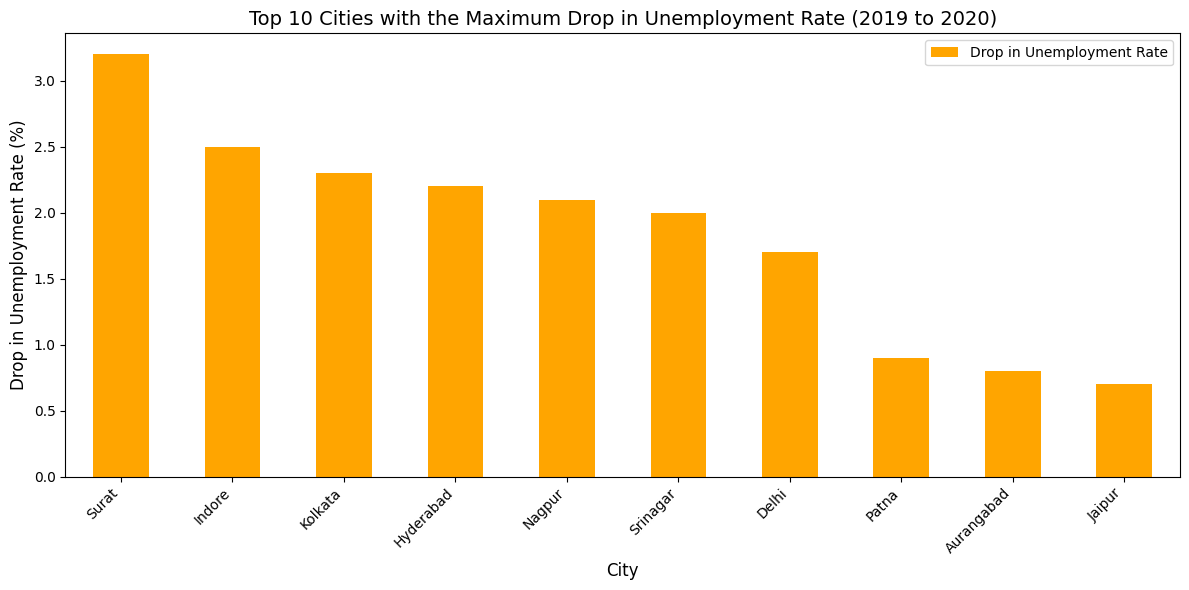

In [141]:
df5=pd.read_csv(r"C:\Users\Piyush\Documents\PDS Project\Data Sets\Economy_Productivity_SD_India.csv")

df5_filtered = df5[df5['Year'].isin([2019, 2020])]

# Pivot the data to have cities as rows and years as columns for 'Unemployment Rate (%)'
df_pivot = df5_filtered.pivot_table(index='City', columns='Year', values='Unemployment Rate (%)')

# Calculate the drop in unemployment rate from 2019 to 2020
df_pivot['Drop in Unemployment Rate'] = df_pivot[2019] - df_pivot[2020]

# Sort cities by the maximum drop in unemployment rate and select the top 10
top_10_cities_drop = df_pivot['Drop in Unemployment Rate'].sort_values(ascending=False).head(10)

# Display the top 10 cities with the biggest drop in unemployment rate
top_10_cities_drop_values = df_pivot.loc[top_10_cities_drop.index][['Drop in Unemployment Rate', 2019, 2020]]
print(top_10_cities_drop_values)

# Plot the results
top_10_cities_drop.plot(kind='bar', figsize=(12, 6), color='orange')

# Adding labels and title to the plot
plt.title('Top 10 Cities with the Maximum Drop in Unemployment Rate (2019 to 2020)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Drop in Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['Drop in Unemployment Rate', '2019 Unemployment Rate', '2020 Unemployment Rate'])

# Show the plot
plt.tight_layout()
plt.show()
